# House Price Prediction
# Imports

In [1]:
import numpy as np 
import pandas as pd 


# plot
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
# import warnings 
# warnings.filterwarnings('ignore')

print("imports sucessful")

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
imports sucessful


# Data Processing

In [2]:
train=pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv", index_col="Id")
test=pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv", index_col="Id")
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [3]:
print("Train.shape: ", train.shape, "\tTest.shape: ", test.shape)

Train.shape:  (1460, 80) 	Test.shape:  (1459, 79)


In [4]:
trainY=train.pop("SalePrice")
trainY

Id
1       208500
2       181500
3       223500
4       140000
5       250000
         ...  
1456    175000
1457    210000
1458    266500
1459    142125
1460    147500
Name: SalePrice, Length: 1460, dtype: int64

In [5]:
trainLen=len(train)
allData=pd.concat((train,test)).reset_index(drop=True)
allData

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2915,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2916,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2917,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


We first want to find and get rid of NaN

In [6]:
objCols = allData.select_dtypes(include=['object']).columns
numCols =allData.select_dtypes(exclude=['object']).columns
objCols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [7]:
numCols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [8]:
print("len num: ", len(numCols),"\tlen num: ", len(objCols))  #a+b=79   so check if we have all in a category

len num:  36 	len num:  43


In [9]:
nan=[col for col in allData.columns if allData[col].isnull().sum()>0] #List of Cols with nan
nan

['MSZoning',
 'LotFrontage',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

In [10]:
print(allData['MasVnrType'].isnull().sum(),allData["MasVnrArea"].isnull().sum()) # =no type=> no area? =>no mas..

24 23


In [11]:
print(allData['GarageType'].isnull().sum(),allData["GarageYrBlt"].isnull().sum())  #similar => no garage=> no jear built

157 159


In [12]:
allData['KitchenQual'].isnull().sum()  # 1 missing   maybe no kitchen

1

In [13]:
# a nan in fireplace. pool etc => no pool/fireplace etc.  Exterior2nd=Nan=probl just 1 material    no basement parameters=> probl no basement...
# you can get information from the data_description.txt
# these assumtions might be false sometime, but the results should be much better than dropping important cols like pool
cat=["Fence","PoolQC", "MiscFeature", "Alley",'FireplaceQu', 'MasVnrType',"Exterior2nd", "BsmtCond","BsmtExposure","BsmtFinType1", "BsmtFinType2", "KitchenQual", 
   "GarageType", "GarageFinish", "GarageQual", 'GarageCond', "BsmtQual"]#fill with None
num=["BsmtFinSF1","MasVnrArea","BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "BsmtFullBath", "BsmtHalfBath", "GarageYrBlt", "GarageCars", "GarageArea", ] #fill with 0
for i in cat:
    allData[i].fillna(value="None", inplace=True)
for i in num:
    allData[i].fillna(value=0, inplace=True)

In [14]:
nan=[col for col in allData.columns if allData[col].isnull().sum()>0] #List of Cols with nan   after filling in stuff
nan # these are the Parameters that you cant fill as easily(as far as i can see)

['MSZoning',
 'LotFrontage',
 'Utilities',
 'Exterior1st',
 'Electrical',
 'Functional',
 'SaleType']

In [15]:
for i in nan:
    print(allData[i].isnull().sum())  # only LotFrontage has a lot of missing vals

4
486
2
1
1
2
1


In [16]:
tiny=['MSZoning', 'Utilities', 'Exterior1st', 'Electrical', 'Functional','SaleType']
allData[tiny] = allData[tiny].fillna(allData.mode().iloc[0])  #fill cat with most common

In [17]:
nan=[col for col in allData.columns if allData[col].isnull().sum()>0] #List of Cols with nan   after filling in stuff
nan # LotFrontage is numerical  = Linear feet of street connected to property
#there are a lot of missing vals   I don't think this parametier is very Important to the price of a House but im not an expert

['LotFrontage']

In [18]:
allData["LotFrontage"] = allData["LotFrontage"].fillna(allData["LotFrontage"].mean())  #fill with mean

now that we have gotten rid of NaN we have to further prep the data

In [19]:
numCols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

notes: <br>
- Maybe we could change YrSold and similar parameters to sold x years ago, which could improve the performance, but I dont't know what time the data has been collected. I will use 2020 as the "now" time. 
- I decide not to combine month and year. Month on its own shows which season the sale took place which could have an impact.

In [20]:
allData["SoldYrAgo"]=2020-allData["YrSold"]
allData["GarageYrBltAgo"]=2020-allData["GarageYrBlt"]
allData["BuiltAgo"]=2020-allData["YearBuilt"]
allData["YrSold"]

0       2008
1       2007
2       2008
3       2006
4       2008
        ... 
2914    2006
2915    2006
2916    2006
2917    2006
2918    2006
Name: YrSold, Length: 2919, dtype: int64

In [21]:
#creating the data to plot with later   before scaling... happens
plotdata=allData[:trainLen]
plotdata["Saleprice"]=trainY

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
#onehot cols that are not linear
# i dont replace all categorical cols, because some should work fine in 1 col, i m looking at the data_description
neededOneHot=["MSZoning", "MSSubClass", "LandContour", "Utilities", "LotConfig", "Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle", "RoofStyle", 
       "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "ExterCond",  "Foundation",  "Heating", "Electrical", "GarageType", "MiscFeature",
        "SaleType", "SaleCondition"]

In [23]:
enc = OneHotEncoder(handle_unknown='ignore')
for col in neededOneHot:
    allData=pd.concat([allData,pd.get_dummies(allData[col],prefix=col)], axis=1)
    allData.drop([col],axis=1, inplace=True)

In [24]:
allData.shape

(2919, 245)

In [25]:
allData.BsmtFinType2.unique()

array(['Unf', 'BLQ', 'None', 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [26]:
# manually concerting "quality" parameters
trans = {"Grvl": 0, "Pave": 1, "None": 2,}
allData['Alley']= allData['Alley'].map(trans)

trans = {"Reg": 0, "IR1": 1, "IR2": 2, "IR3": 3, "None": 4}
allData['LotShape']= allData['LotShape'].map(trans)

trans = {"Gtl": 0, "Mod": 1, "Sev": 2, "None": 3}
allData['LandSlope']= allData['LandSlope'].map(trans)

trans = {"Ex": 0, "Gd": 1, "TA": 2, "Fa": 3, "Po": 4, "None": 5}
allData['ExterQual']= allData['ExterQual'].map(trans)

trans = {"Ex": 0, "Gd": 1, "TA": 2, "Fa": 3, "Po": 4,  "None": 5}
allData['BsmtQual']= allData['BsmtQual'].map(trans)

trans = {"Ex": 0, "Gd": 1, "TA": 2, "Fa": 3, "Po": 4,  "None": 5}
allData['BsmtCond']= allData['BsmtCond'].map(trans)

trans = { "Gd": 1, "Av": 2, "Mn": 3, "No": 4,  "None": 5}
allData['BsmtExposure']= allData['BsmtExposure'].map(trans)

trans = {"GLQ": 0, "ALQ": 1, "BLQ": 2, "Rec": 3, "LwQ": 4,  "Unf": 5, "None": 6}
allData['BsmtFinType1']= allData['BsmtFinType1'].map(trans)

trans = {"GLQ": 0, "ALQ": 1, "BLQ": 2, "Rec": 3, "LwQ": 4,  "Unf": 5, "None": 6}
allData['BsmtFinType2']= allData['BsmtFinType2'].map(trans)

trans = {"Ex": 0, "Gd": 1, "TA": 2, "Fa": 3, "Po": 4, "None": 5}
allData['HeatingQC']= allData['HeatingQC'].map(trans)

trans = {"Ex": 0, "Gd": 1, "TA": 2, "Fa": 3, "Po": 4, "None": 5}
allData['KitchenQual']= allData['KitchenQual'].map(trans)

trans = {"Typ": 0, "Min1": 1, "Min2": 2, "Mod": 3, "Maj1": 4,  "Maj2": 5,"Sev": 6,"Sal": 7, "None": 8}
allData['Functional']= allData['Functional'].map(trans)

trans = {"Ex": 0, "Gd": 1, "TA": 2, "Fa": 3, "Po": 4, "None": 5}
allData['FireplaceQu']= allData['FireplaceQu'].map(trans)

trans = {"Fin": 0, "RFn": 1, "Unf": 2,  "None": 3}
allData['GarageFinish']= allData['GarageFinish'].map(trans)

trans = {"Ex": 0, "Gd": 1, "TA": 2, "Fa": 3, "Po": 4, "None": 5}
allData['GarageQual']= allData['GarageQual'].map(trans)

trans = {"Ex": 0, "Gd": 1, "TA": 2, "Fa": 3, "Po": 4, "None": 5}
allData['GarageCond']= allData['GarageCond'].map(trans)

trans = {"Ex": 0, "Gd": 1, "TA": 2, "Fa": 3, "Po": 4, "None": 5}
allData['PoolQC']= allData['PoolQC'].map(trans)

trans = {"GdPrv": 0, "MnPrv": 1, "GdWo": 2, "MnWw": 3,  "None": 5}
allData['Fence']= allData['Fence'].map(trans)

In [27]:
#redo after onehot etc
objCols = allData.select_dtypes(include=['object']).columns
numCols =allData.select_dtypes(exclude=['object']).columns
objCols

Index(['Street', 'CentralAir', 'PavedDrive'], dtype='object')

In [28]:
l=[]
for i in objCols: #showing cat data example
    l.append(allData[i][0])
print(l)

['Pave', 'Y', 'Y']


In [29]:
#changing cat. data to num
for i in objCols:
    allData[i]= allData[i].astype('category').cat.codes

In [30]:
l=[]
for i in objCols: #showing they changed to num
    l.append(allData[i][0])
print(l)

[1, 1, 2]


In [31]:
#drop the cols we have twice
allData.drop("YrSold", axis=1, inplace=True)
allData.drop("GarageYrBltAgo", axis=1, inplace=True)
allData.drop("BuiltAgo", axis=1, inplace=True)

In [32]:
allData.shape #the shape stays the same

(2919, 242)

In [33]:
scaler = MinMaxScaler()
for col in allData.columns:
    allData[col] = scaler.fit_transform(allData[col].values.reshape(-1,1))

In [34]:
allData

,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.150685,0.033420,1.0,1.0,0.000000,0.0,0.666667,0.500,0.949275,0.883333,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.202055,0.038795,1.0,1.0,0.000000,0.0,0.555556,0.875,0.753623,0.433333,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.160959,0.046507,1.0,1.0,0.333333,0.0,0.666667,0.500,0.934783,0.866667,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.133562,0.038561,1.0,1.0,0.333333,0.0,0.666667,0.500,0.311594,0.333333,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.215753,0.060576,1.0,1.0,0.333333,0.0,0.777778,0.500,0.927536,0.833333,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,0.000000,0.002973,1.0,1.0,0.000000,0.0,0.333333,0.750,0.710145,0.333333,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2915,0.000000,0.002776,1.0,1.0,0.000000,0.0,0.333333,0.500,0.710145,0.333333,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2916,0.476027,0.087406,1.0,1.0,0.000000,0.0,0.444444,0.750,0.637681,0.766667,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2917,0.140411,0.042726,1.0,1.0,0.000000,0.0,0.444444,0.500,0.869565,0.700000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [35]:
#data for the models
trainX=np.array(allData[:trainLen])
testX=np.array(allData[trainLen:])
trainY=np.array(trainY)
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal


# Plot
I don't know what I want to plot as the nr. of cols is overwhelming and I don't know much about House-Prices.

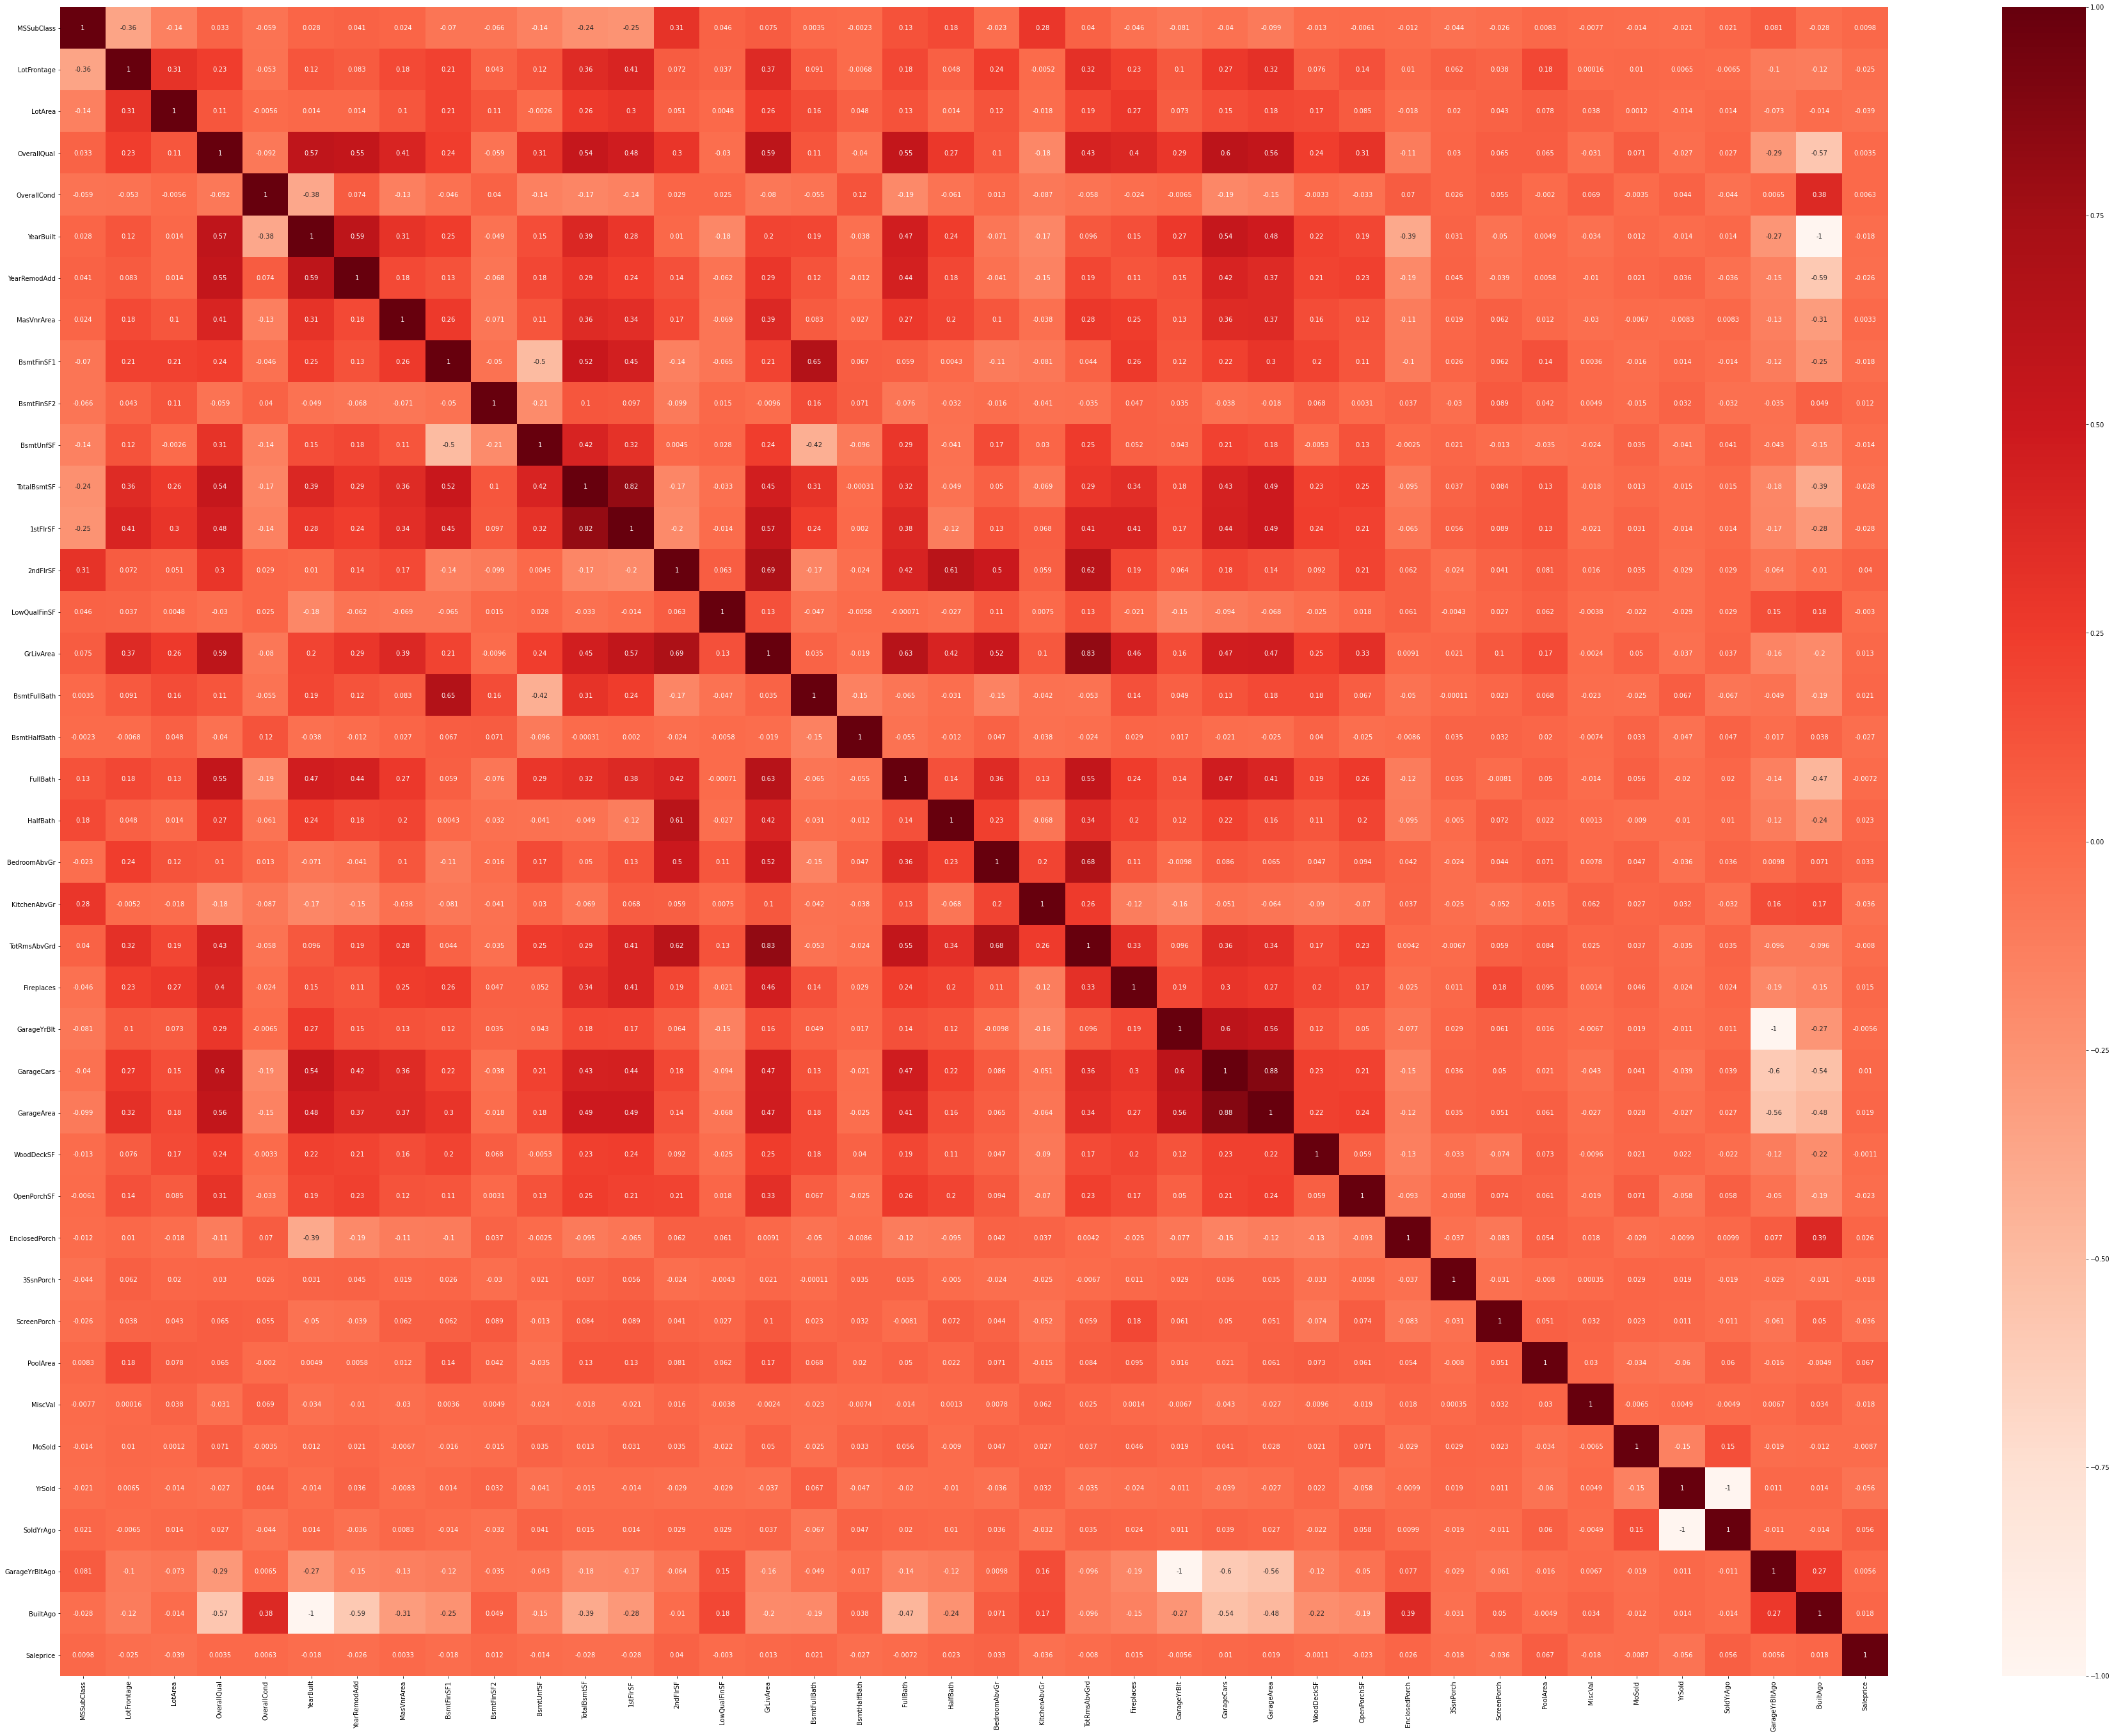

In [36]:
#attention this will take a while
plt.figure(figsize=(64,48))
sns.heatmap(plotdata.corr(),annot=True,cmap='Reds')
plt.show()# a lot of small correlations

As seen on the Heatmap, the correlations between the parameters and Saleprice are very small.<br>
It is also notable that YearBuilt and BuiltAgo for example have the same correlation, which is logical as they say the same thing

In [37]:
plotdata.columns#seel what I can plot with

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

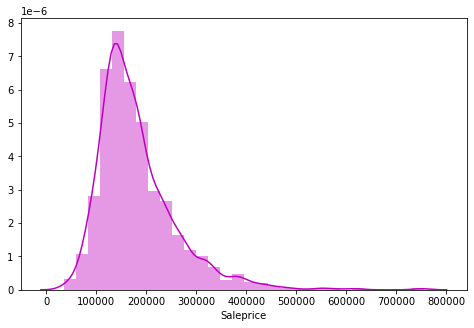

In [38]:
plt.figure(figsize=(8,5))
sns.distplot(plotdata['Saleprice'],bins=30,color='m')

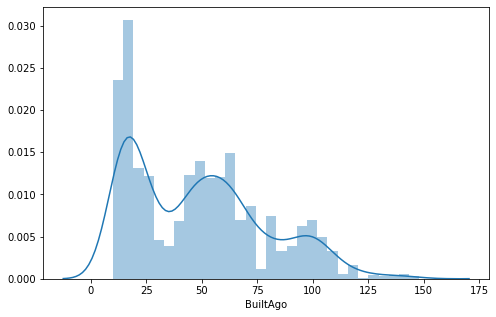

In [39]:
plt.figure(figsize=(8,5))
sns.distplot(plotdata['BuiltAgo'],bins=30)# most houses are not that old

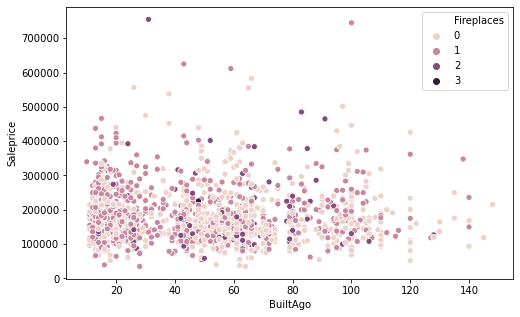

In [40]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="BuiltAgo",y="Saleprice",hue="Fireplaces",  data=plotdata)# fireplaces are nice, but they are not that hard to build if the house does not have one already

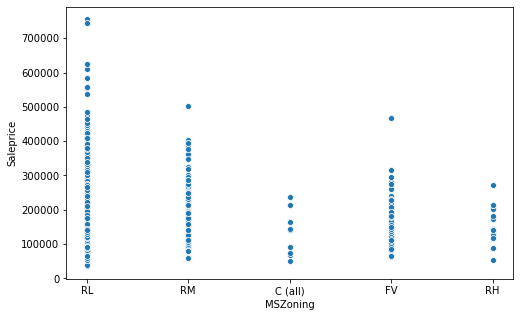

In [41]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="MSZoning",y="Saleprice",  data=plotdata)# some are clearly "cheaper"

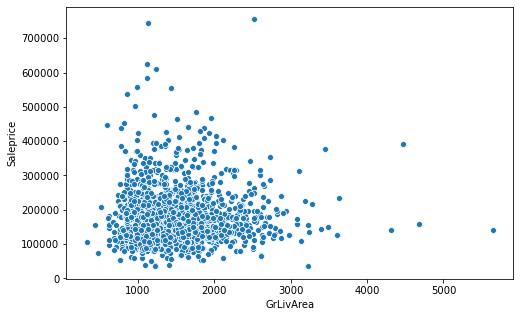

In [42]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="GrLivArea",y="Saleprice",  data=plotdata) 

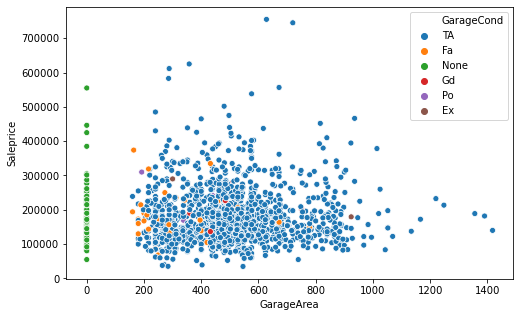

In [43]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="GarageArea",y="Saleprice",hue="GarageCond",  data=plotdata)

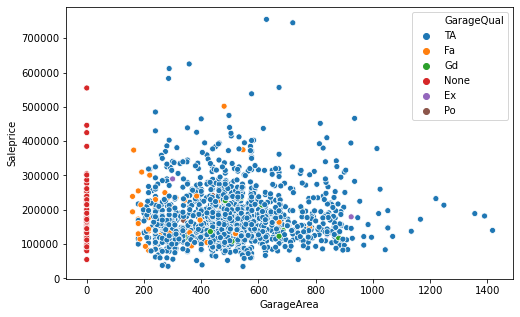

In [44]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="GarageArea",y="Saleprice",hue="GarageQual",  data=plotdata)

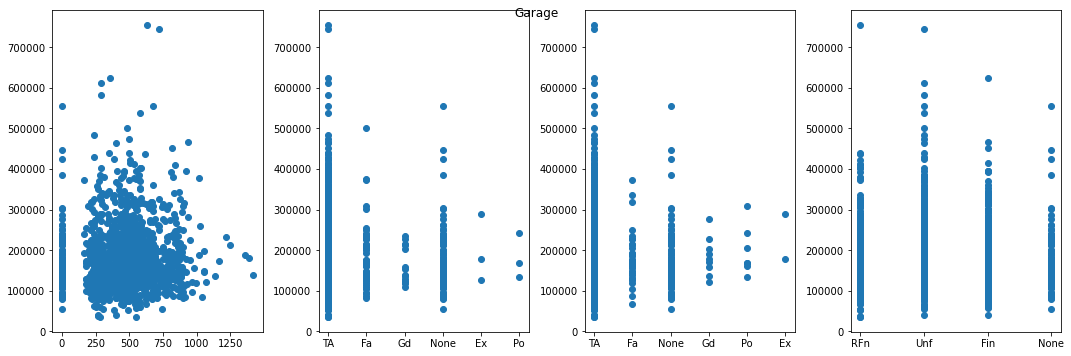

<Figure size 5760x3600 with 0 Axes>

In [45]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(15,5))
plt.figure(figsize=(80,50))
fig.suptitle('Garage')
ax1.scatter(x="GarageArea",y="Saleprice",  data=plotdata, linewidth=1)
ax2.scatter(x="GarageQual",y="Saleprice",  data=plotdata, linewidth=1)
ax3.scatter(x="GarageCond",y="Saleprice",  data=plotdata, linewidth=1)
ax4.scatter(x="GarageFinish",y="Saleprice",  data=plotdata, linewidth=1)

fig.tight_layout()

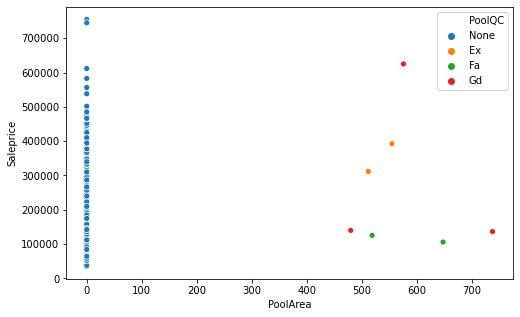

In [46]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="PoolArea",y="Saleprice",hue="PoolQC",  data=plotdata)# a pool does not seem to make a house very expensive interestingly

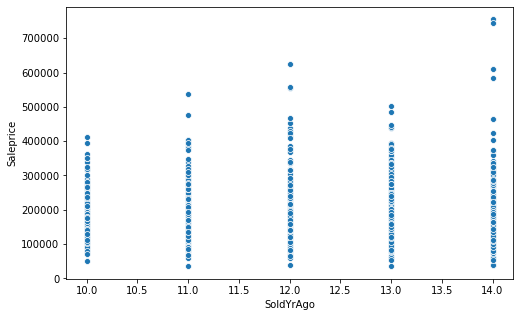

In [47]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="SoldYrAgo",y="Saleprice", data=plotdata)#older sales=> more expensive  (bubble?)

# Models
testing several models.

# Linear regression

In [48]:
# from sklearn.linear_model import LinearRegression

In [49]:
# modelLin = LinearRegression()
# modelLin.fit(train, trainY)
# predTrain=modelLin.predict(train)
# LinAcc = mean_squared_error(predTrain, trainY)
# print (str(LinAcc) + ' MSE')

# XGBoost

In [50]:
import xgboost

In [51]:
# #xgboost
# modelX=xgboost.XGBRegressor(verbose=2)

# n_estimators = [500, 900, 2000] # a lot of cols=> many estim..
# max_depth = [3, 6,9,12]
# booster=['gbtree','gblinear'] #"dart"
# learning_rate=[.02,.05,.1,.2]
# min_child_weight=[2,5,9]
# base_score=[.01,.25,.5,.75]
# max_depth=[2,4,6,8]
# min_split_loss=[0,0.01,.1]
# hyperparameter_grid = {
#     'n_estimators': n_estimators,
#     'max_depth':max_depth,
#     'learning_rate':learning_rate,
#     'min_child_weight':min_child_weight,
#     'booster':booster,
#     'base_score':base_score,
#     "max_depth":max_depth,
#     "min_split_loss":min_split_loss}

# random_cv = RandomizedSearchCV(estimator=modelX,
#             param_distributions=hyperparameter_grid,
#             cv=5, n_iter=100,
#             scoring='neg_root_mean_squared_error',
#                                n_jobs = -1,
#             verbose = 10, 
#             return_train_score = True,
#             random_state=42)

# random_cv.fit(trainX,trainY)

In [52]:
# random_cv.best_estimator_    #if best estim are at the edge=> additional tests

In [53]:
# modelX=xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
#              importance_type='gain', interaction_constraints='',
#              learning_rate=0.02, max_delta_step=0, max_depth=4,
#              min_child_weight=9, min_split_loss=0, missing=None,
#              monotone_constraints='()', n_estimators=2000, n_jobs=0,
#              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
#              scale_pos_weight=1, subsample=1, tree_method='exact',
#              validate_parameters=1, verbosity=None)

In [54]:
# #xgboost 2. tuning after getting the base estimates
# modelX=xgboost.XGBRegressor(verbose=2)

# n_estimators = [1500, 2000,2500] # a lot of cols=> many estim..
# max_depth = [3, 5,6]
# booster=['gbtree'] #"dart"
# learning_rate=[.01,.02,.03]
# min_child_weight=[7,9]
# base_score=[.4,.5,.6]
# max_depth=[2,4,6,8]
# min_split_loss=[0]
# hyperparameter_grid = {
#     'n_estimators': n_estimators,
#     'max_depth':max_depth,
#     'learning_rate':learning_rate,
#     'min_child_weight':min_child_weight,
#     'booster':booster,
#     'base_score':base_score,
#     "max_depth":max_depth,
#     "min_split_loss":min_split_loss}

# random_cv = RandomizedSearchCV(estimator=modelX,
#             param_distributions=hyperparameter_grid,
#             cv=5, n_iter=50,
#             scoring='neg_root_mean_squared_error',
#                                n_jobs = -1,
#             verbose = 10, 
#             return_train_score = True,
#             random_state=42)

# random_cv.fit(trainX,trainY)

In [55]:
# random_cv.best_estimator_    #if best estim are at the edge=> additional tests

In [56]:
modelX=xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.02, max_delta_step=0, max_depth=8,
             min_child_weight=9, min_split_loss=0, missing=None,
             monotone_constraints='()', n_estimators=2000, n_jobs=0,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbose=2, verbosity=None)

In [57]:
modelX.fit(trainX,trainY)

[12:49:42] WARNING: /workspace/src/learner.cc:480: 
Parameters: { verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.02, max_delta_step=0, max_depth=8,
             min_child_weight=9, min_split_loss=0, missing=None,
             monotone_constraints='()', n_estimators=2000, n_jobs=0,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbose=2, verbosity=None)

In [58]:
predTrain=modelX.predict(trainX)
XAcc = mean_squared_error(predTrain, trainY)
print (str(XAcc) + ' MSE')

8393543.539543299 MSE


# save Prediction

In [59]:
predictions=pd.DataFrame({'Id': test.index,
                       'SalePrice': modelX.predict(testX)})

In [60]:
predictions

,Id,SalePrice
0,1461,125831.648438
1,1462,154524.218750
2,1463,185134.093750
3,1464,199282.828125
4,1465,185519.328125
...,...,...
1454,2915,78494.054688
1455,2916,79787.585938
1456,2917,168575.921875
1457,2918,115877.351562


In [61]:
predictions.to_csv("submit.csv", index=False)